# Análise de Séries Históricas de Tarifas Aéreas 

#### Frederico Horst

Fontes dos Dados:
- Séries históricas de tarifas aéreas, por origem, destino e empresa: disponível no site da ANAC em:
https://sistemas.anac.gov.br/sas/downloads/view/frmDownload.aspx
- Série histórica do IPCA: disponível no site do IBGE em:
https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

Mais informações sobre o tarifário:
https://www.anac.gov.br/assuntos/dados-e-estatisticas/mercado-do-transporte-aereo

Objetivo:
- Construir o intervalo de confiança da média de preços praticados por trecho. 
- O intervalo de confiança deve ser de 95% de confiança.
- O intervalo será por trecho, independente da companhia aérea. A ideia, primeiramente, é ver sob a ótica do consumidor.

Vamos começar rodando separadamente o arquivo main.py que executará as principais modificações nos arquivos. Neste notebook vamos apenas fazer a análise.

In [1]:
# importando libs necessárias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importando as séries de dados resumidos e os dicionários:

In [2]:
# importando a base de tarifas deflacionadas médias:
df_tarifas_sts = pd.read_csv('df_tarifas_sts.csv')
df_tarifas_sts = df_tarifas_sts.drop(columns=['Unnamed: 0'])
df_tarifas_sts['PERIODO'] = df_tarifas_sts.PERIODO.astype(str)
# importando o dicionário de dados dos aeroportos:
aeroportos = pd.read_csv('aeroportos.csv',';')


In [3]:
# # tarifas para entre as cidades: São Paulo, Brasília, Rio de Janeiro, Porto Alegre e Curitiba
# cidades = ['São Paulo', 'Rio de Janeiro', 'Brasília', 'Porto Alegre', 'Curitiba']
# aeroportos_selecionados = aeroportos[aeroportos['Cidade'].isin(cidades)]

In [4]:
origens = df_tarifas_sts['ORIGEM'].unique()
destinos = df_tarifas_sts['DESTINO'].unique()

In [5]:
# df_tarifas_sts.columns.values

In [6]:
df_tarifas_sts.head()

ANO  MES PERIODO ORIGEM DESTINO  TARIFA DEFLACIONADA MÉDIA  FREQUÊNCIA  \
0  2002    1  200201   SBBR    SBSP                  12.821182       35336   
1  2002    2  200202   SBBR    SBSP                  13.517763       35761   
2  2002    3  200203   SBBR    SBSP                  13.011220       42096   
3  2002    4  200204   SBBR    SBSP                  11.714892       38160   
4  2002    5  200205   SBBR    SBSP                  11.884194       38345   

   TARIFA DEFLACIONADA MÉDIA - PERCENTIL 2,5  \
0                                  12.766377   
1                                  13.462717   
2                                  12.959290   
3                                  11.655091   
4                                  11.823763   

   TARIFA DEFLACIONADA MÉDIA - PERCENTIL 50  \
0                                 12.820485   
1                                 13.517993   
2                                 13.012765   
3                                 11.715222   
4                                 11.882223   

   TARIFA DEFLACIONADA MÉDIA - PERCENTIL 97,5  
0                                   12.873421  
1                                   13.573123  
2                                   13.066192  
3                                   11.767481  
4                                   11.944476

### Regressão Linear:
review: https://www.statsmodels.org/stable/tsa.html

In [23]:
import statsmodels.api as sm

In [24]:
# y = df_tarifas_sts['TARIFA DEFLACIONADA MÉDIA']
# x = df_tarifas_sts.PERIODO
# x_sm = sm.add_constant(x) 
# results = sm.OLS(y, x_sm).fit() 
# results.summary
# results.predict(x_sm)


### Gráficos:

SBBR SBSP
SBBR SBGL
SBBR SBCT
SBBR SBRJ
SBSP SBGL
SBSP SBCT
SBSP SBRJ
SBSP SBBR
SBGL SBSP
SBGL SBCT
SBGL SBBR
SBCT SBSP
SBCT SBGL
SBCT SBRJ
SBCT SBBR
SBRJ SBSP
SBRJ SBCT
SBRJ SBBR


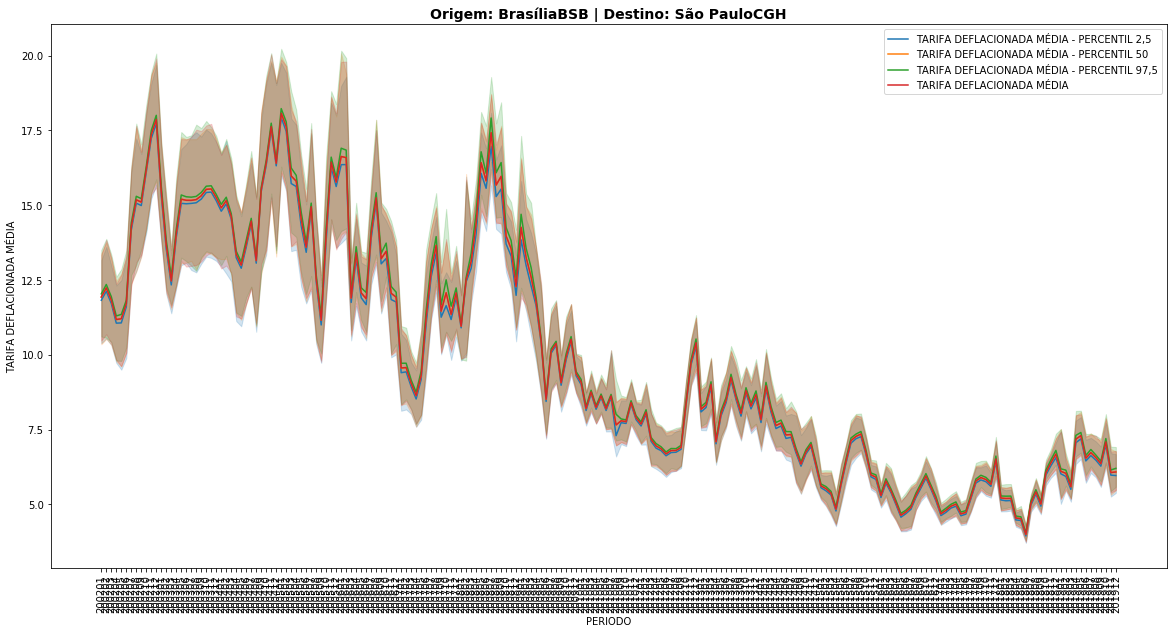

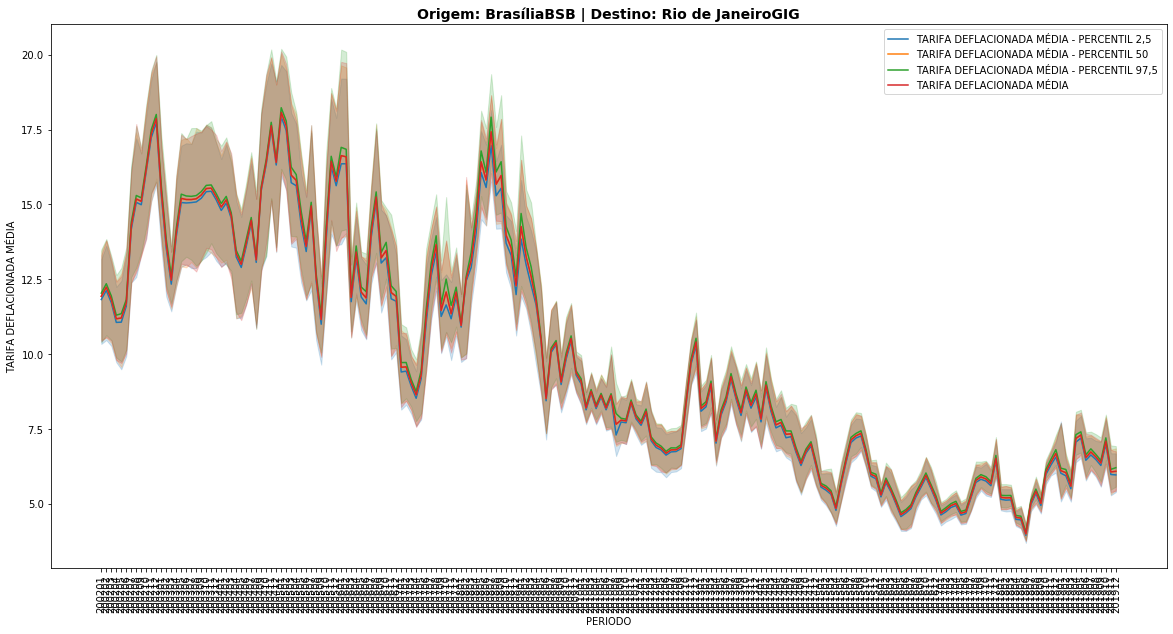

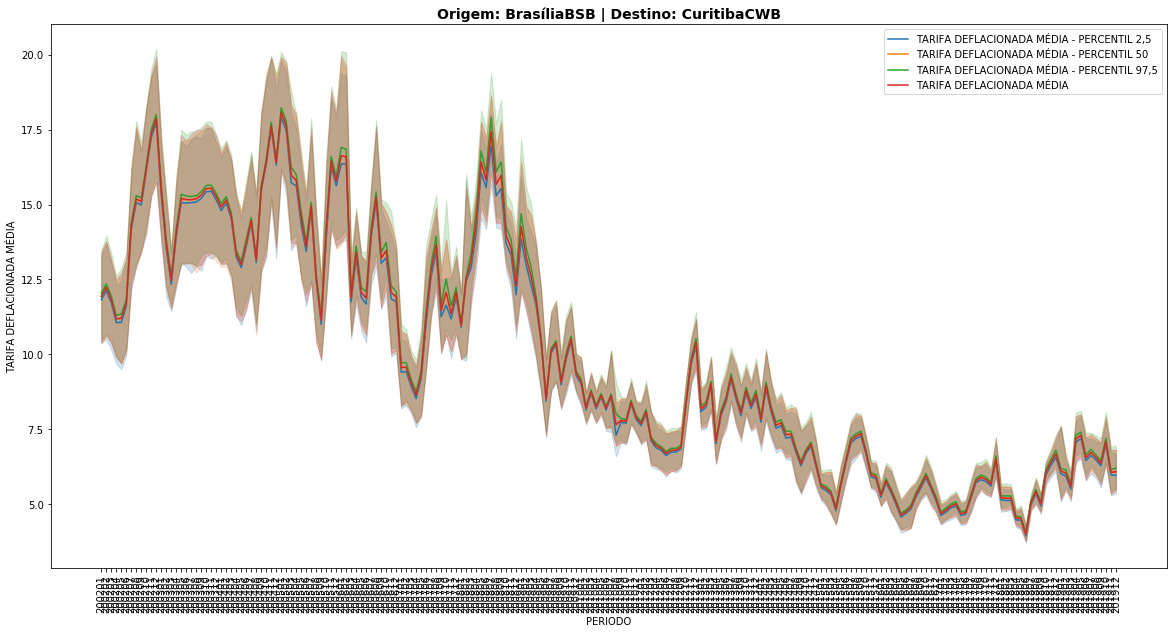

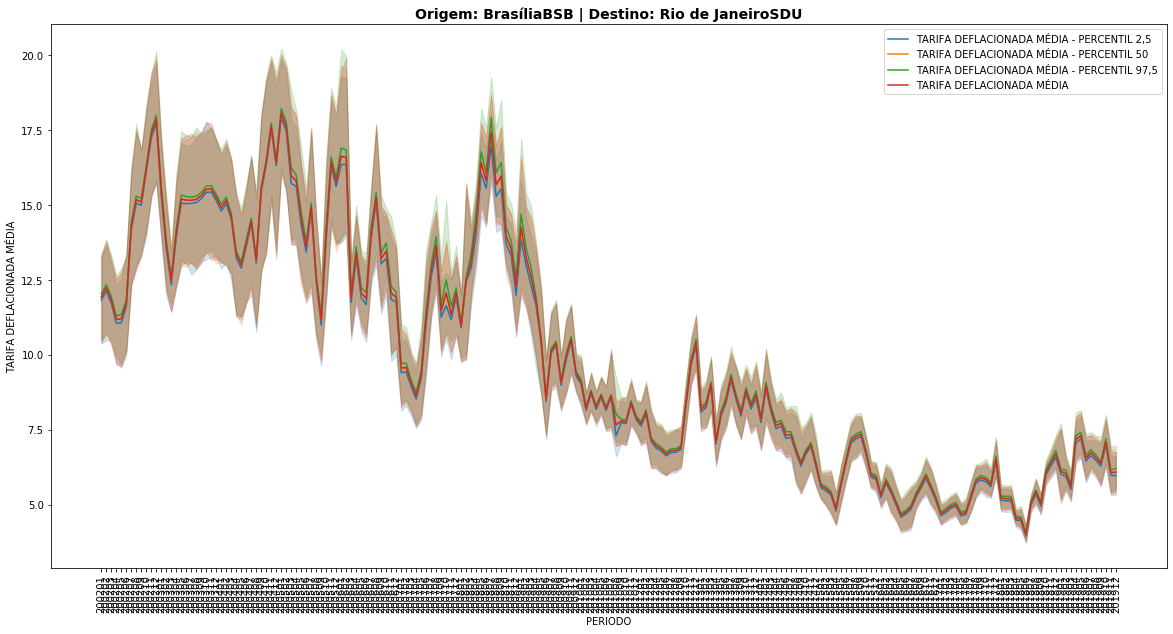

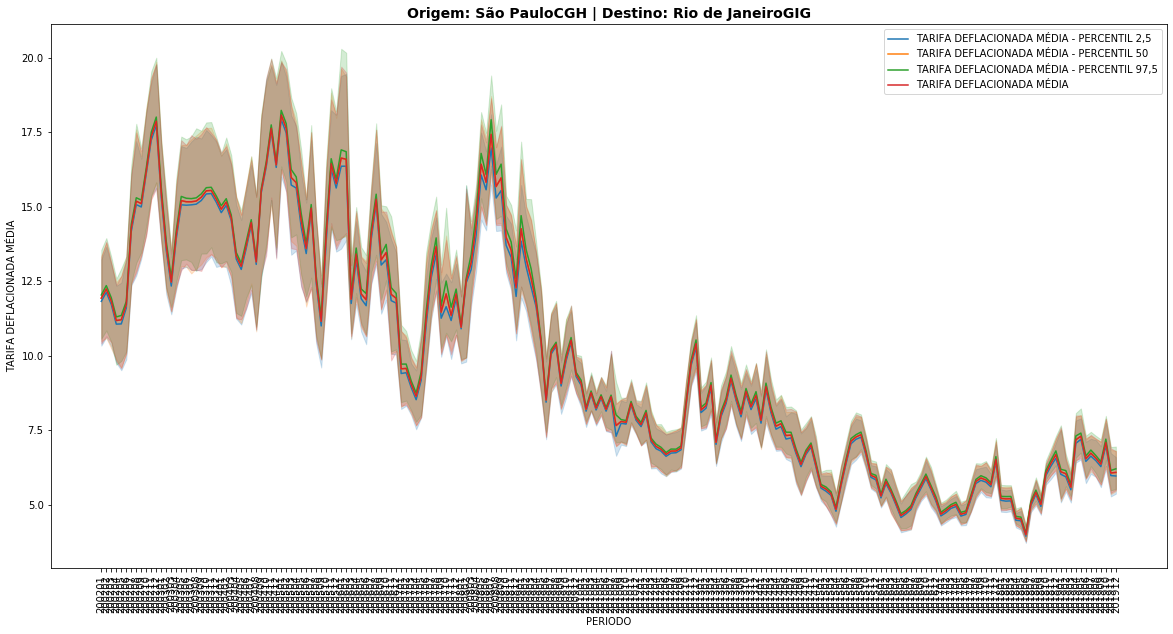

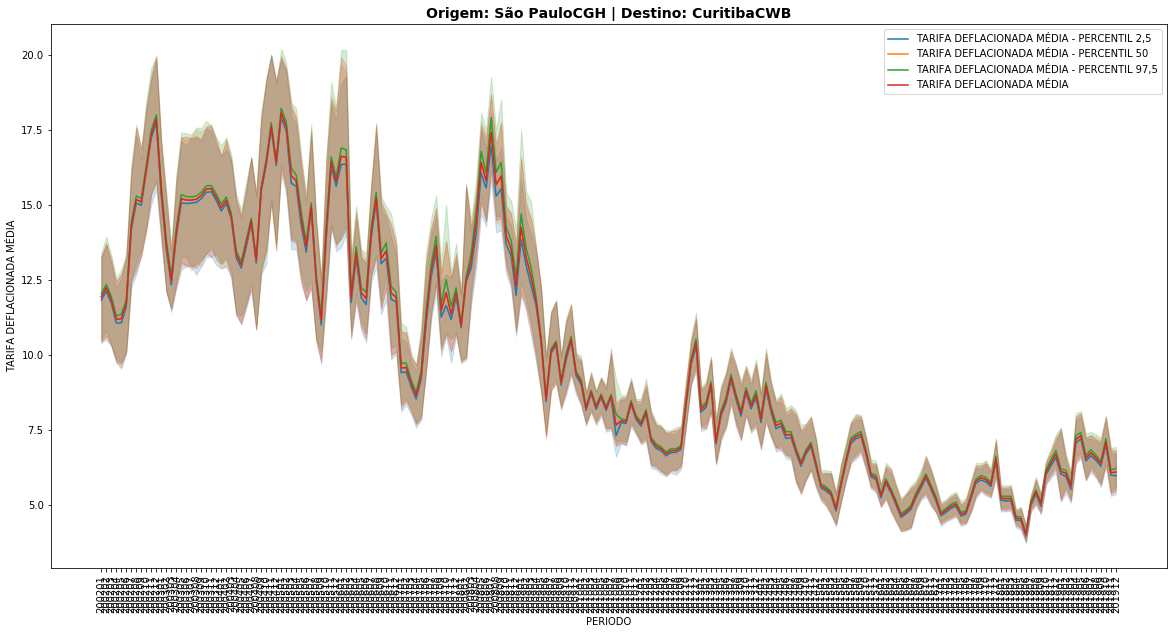

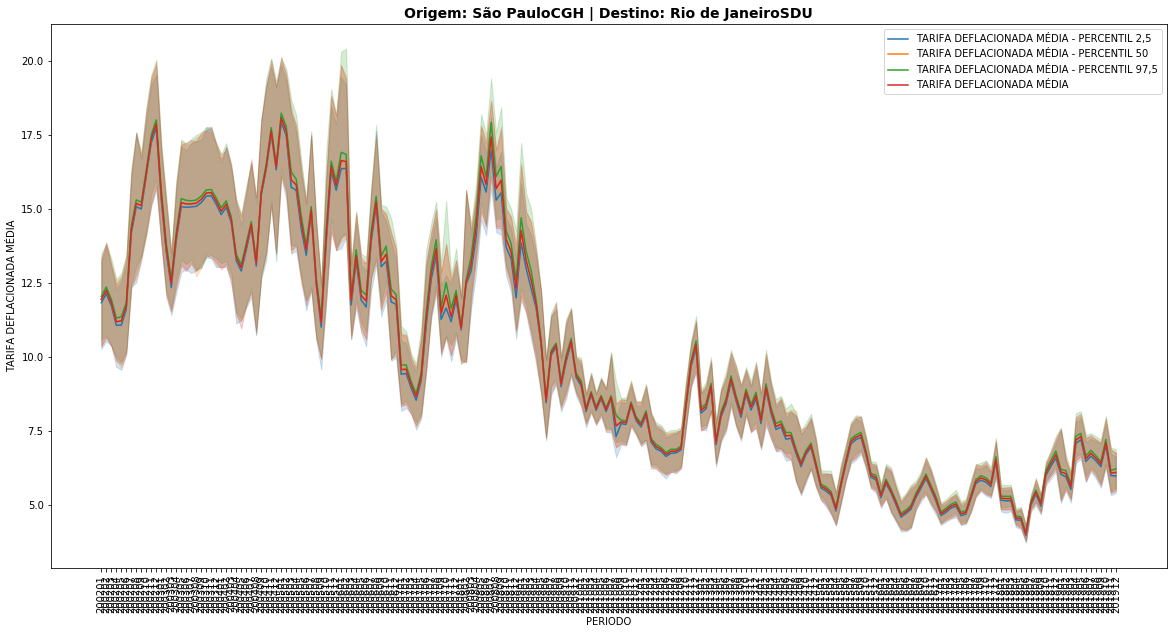

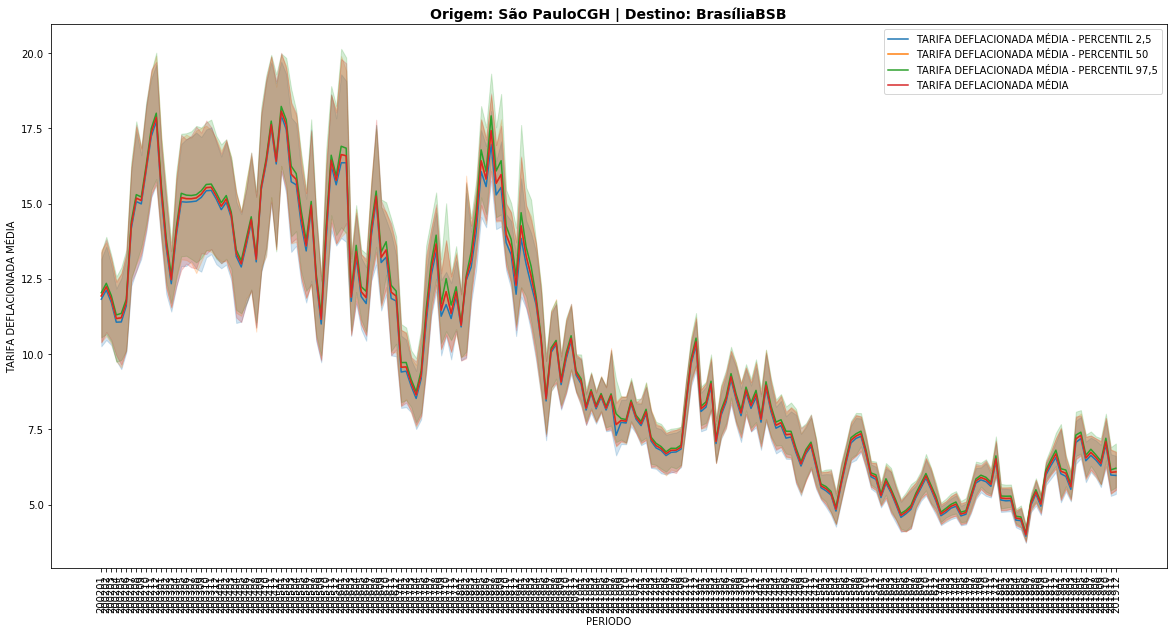

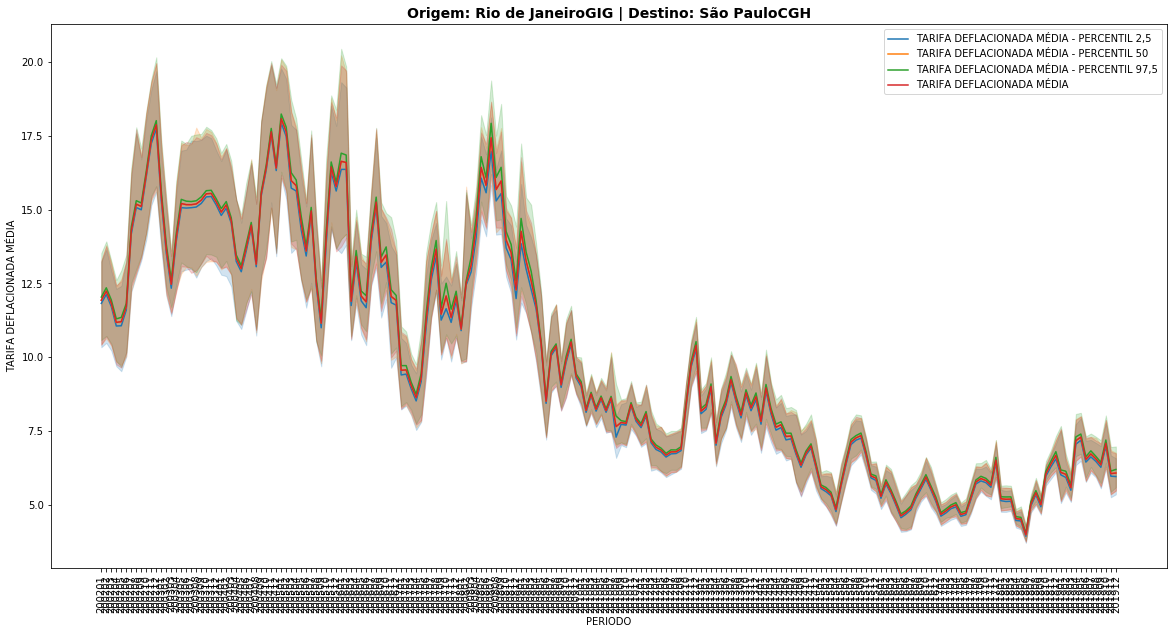

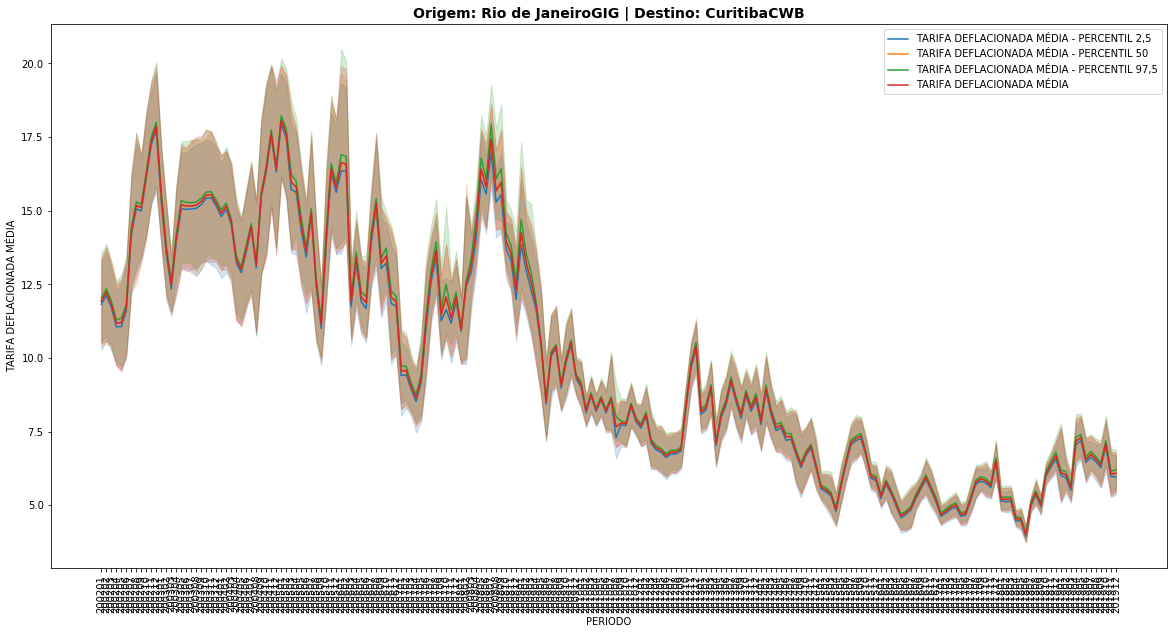

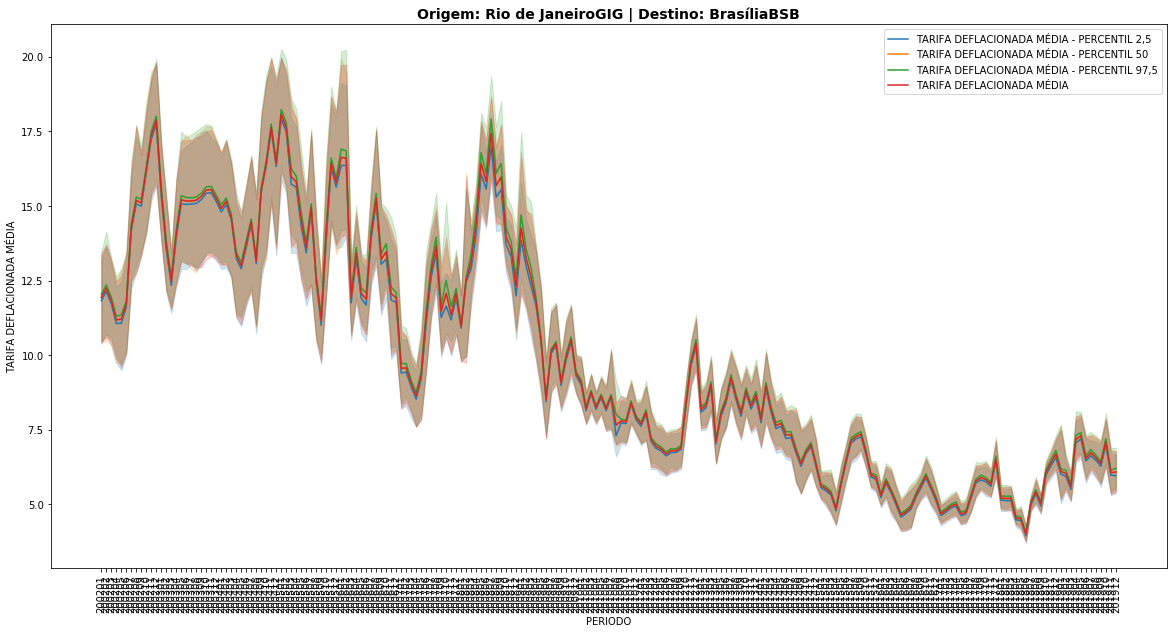

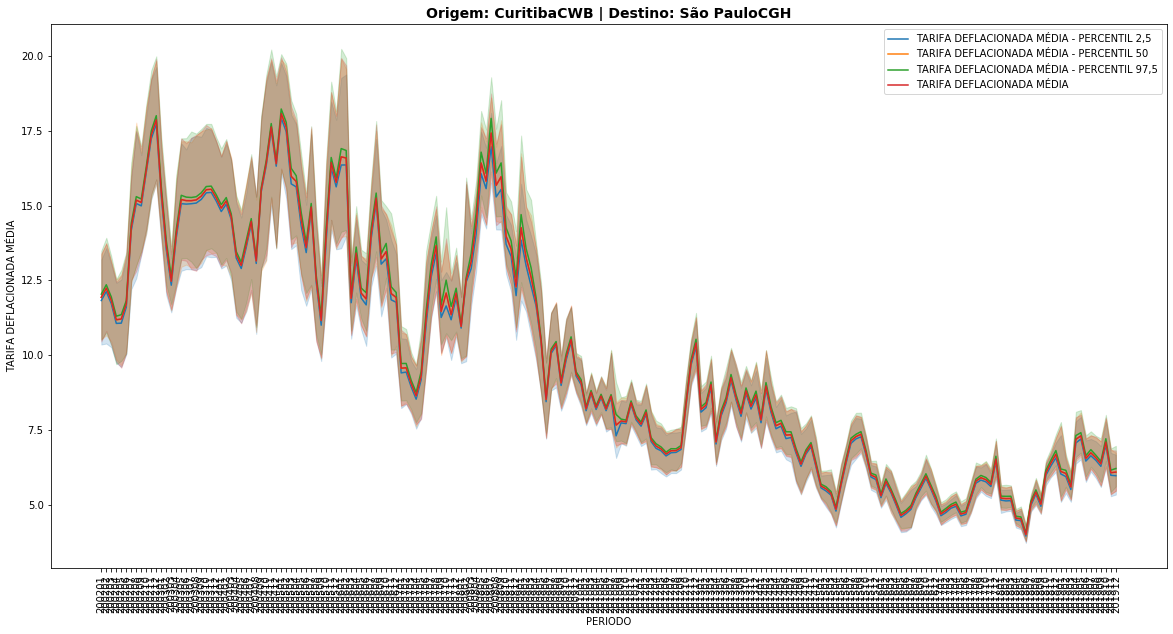

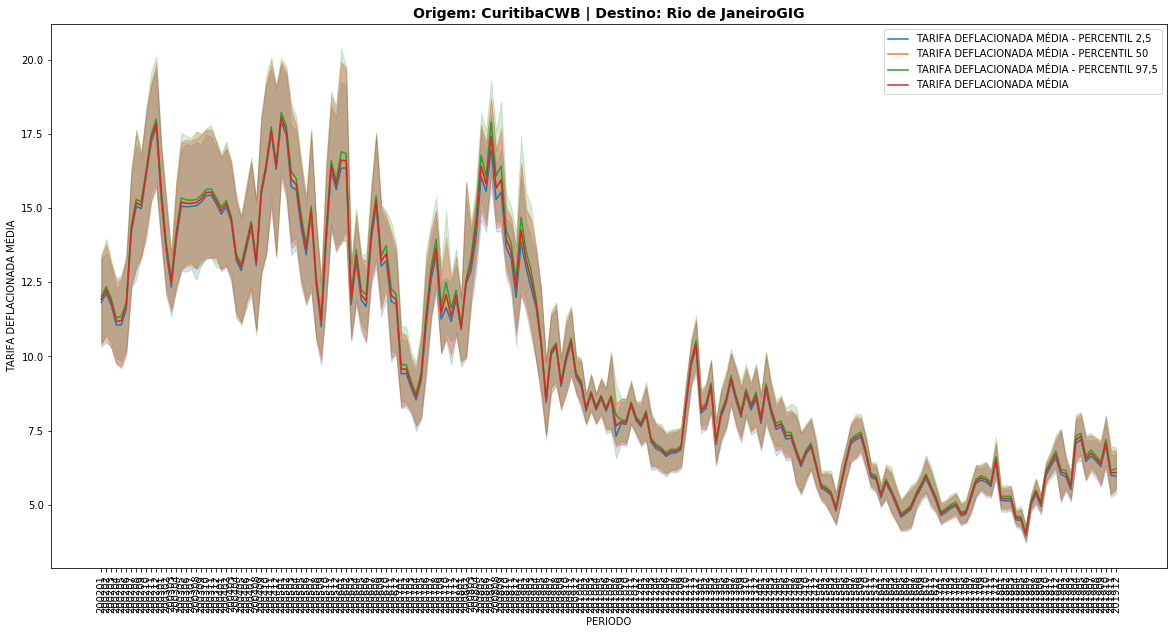

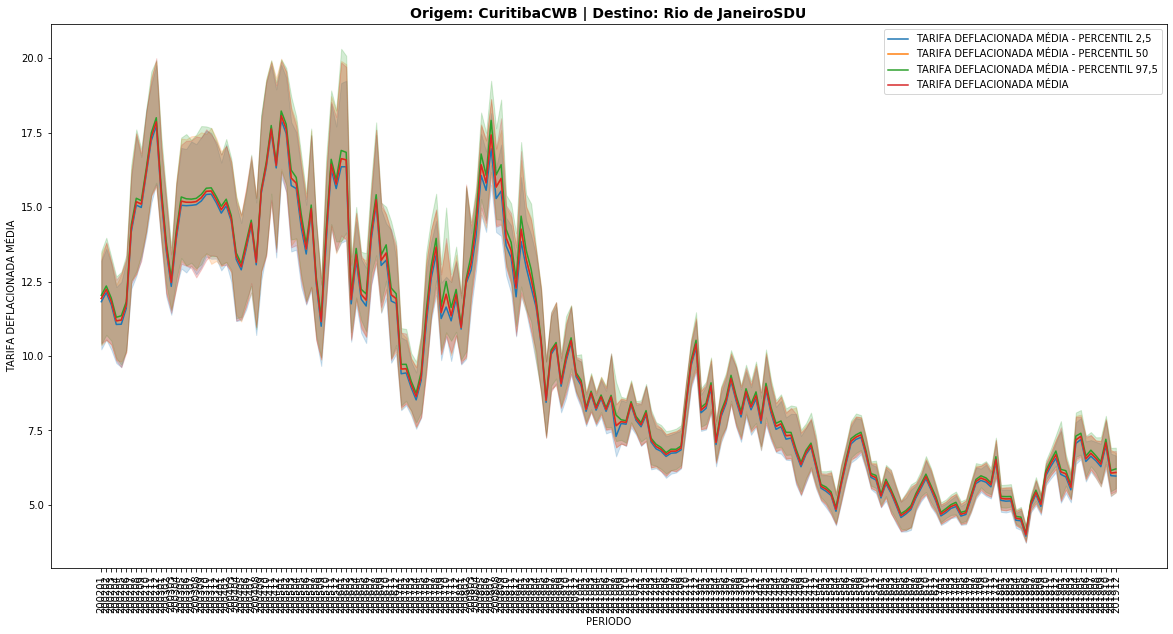

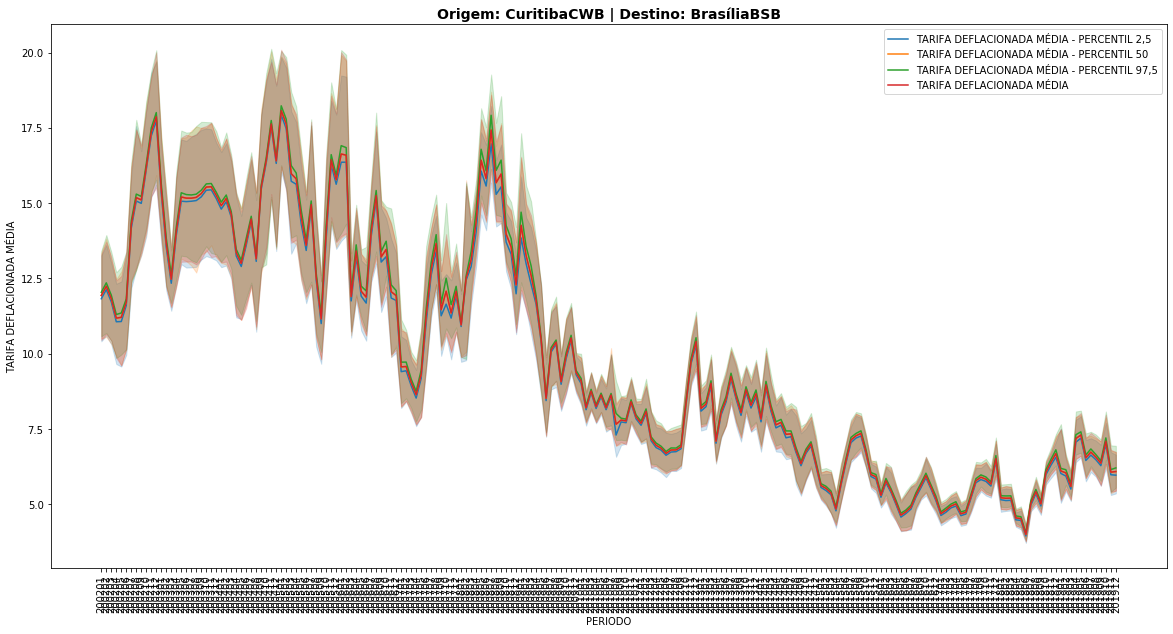

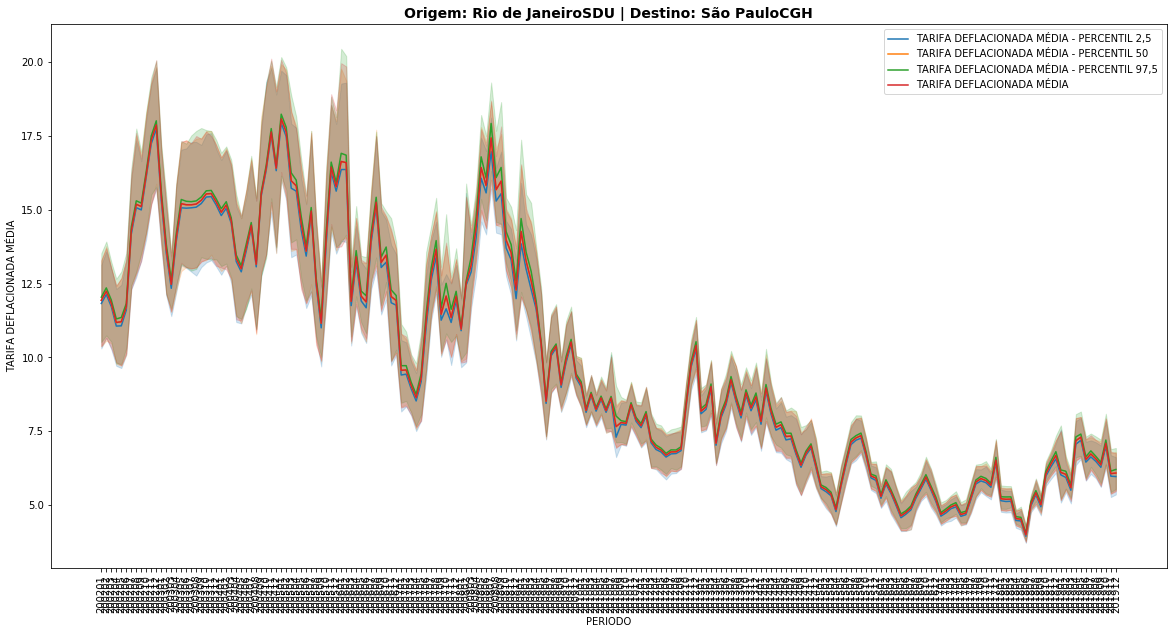

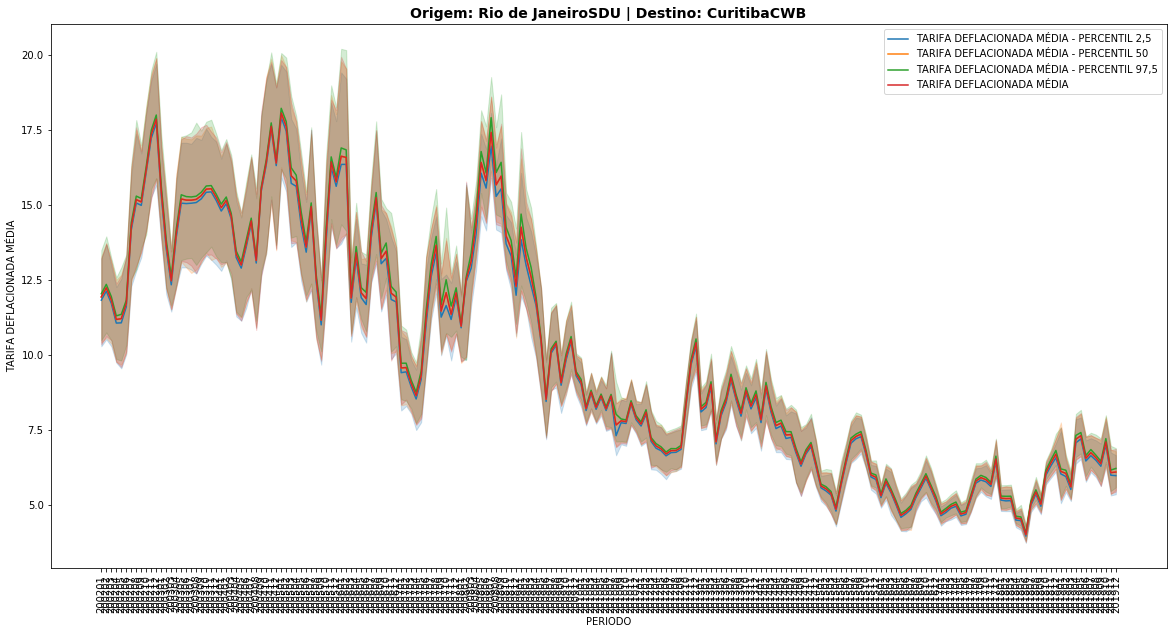

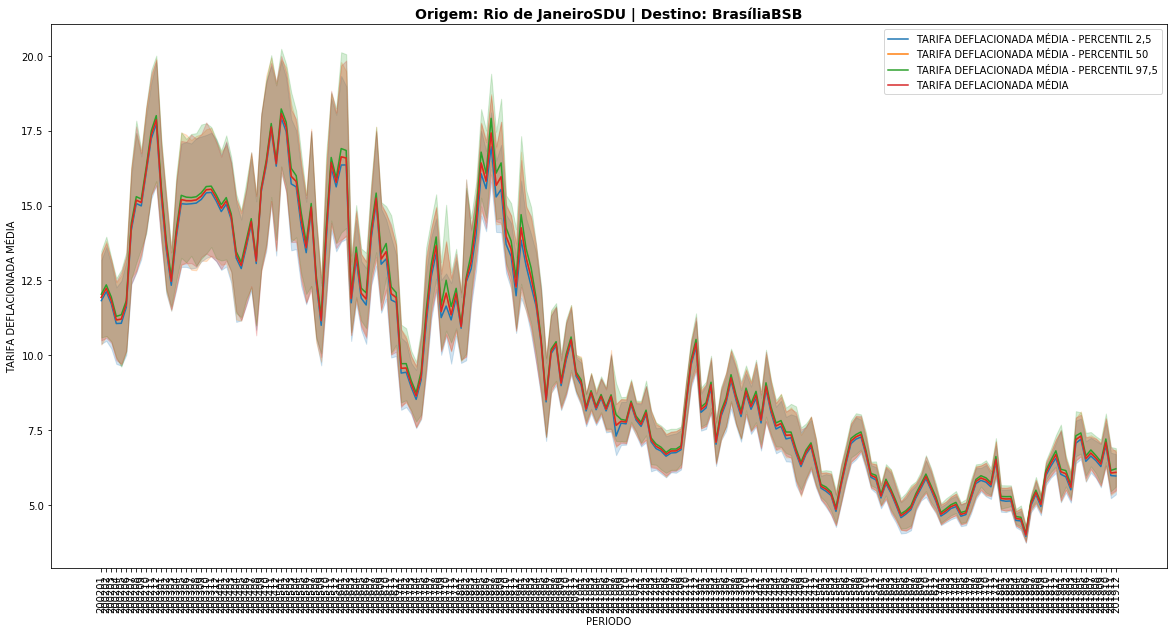

In [7]:
for origem in origens:
    for destino in destinos:
        origem_cidade = aeroportos[aeroportos.ICAO == destino].Cidade.values #.strip("['").str.strip("']")
        destino_cidade = aeroportos[aeroportos.ICAO == origem].Cidade.values
        if origem_cidade != destino_cidade:
            print(origem, destino)
            f, ax = plt.subplots(figsize=(20,10), sharey=True, sharex=True)
            f = sns.lineplot(x='PERIODO', y='TARIFA DEFLACIONADA MÉDIA - PERCENTIL 2,5', data=df_tarifas_sts)
            f = sns.lineplot(x='PERIODO', y='TARIFA DEFLACIONADA MÉDIA - PERCENTIL 50', data=df_tarifas_sts)
            f = sns.lineplot(x='PERIODO', y='TARIFA DEFLACIONADA MÉDIA - PERCENTIL 97,5', data=df_tarifas_sts)
            f = sns.lineplot(x='PERIODO', y='TARIFA DEFLACIONADA MÉDIA', data=df_tarifas_sts)
            f = ax.legend(['TARIFA DEFLACIONADA MÉDIA - PERCENTIL 2,5',
                           'TARIFA DEFLACIONADA MÉDIA - PERCENTIL 50', 
                           'TARIFA DEFLACIONADA MÉDIA - PERCENTIL 97,5', 
                           'TARIFA DEFLACIONADA MÉDIA'])
            f = ax.set_title('Origem: ' + str(aeroportos[aeroportos.ICAO == origem].Cidade.values).strip("['").strip("']") + 
                             str(aeroportos[aeroportos.ICAO == origem].IATA.values).strip("['").strip("']") + 
                             ' | Destino: ' + str(aeroportos[aeroportos.ICAO == destino].Cidade.values).strip("['").strip("']") +
                             str(aeroportos[aeroportos.ICAO == destino].IATA.values).strip("['").strip("']"), 
                             fontweight='bold',fontsize=14)
            f = ax.set_xlabel('PERIODO')
            f = plt.xticks(rotation=90)
        else:
            pass